In [1]:
import tensorflow as tf
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from tensorflow.examples.tutorials.mnist import input_data

In [3]:
mnist=input_data.read_data_sets('MNIST_data/',one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [4]:
type(mnist)

tensorflow.contrib.learn.python.learn.datasets.base.Datasets

In [5]:
mnist.train.images

array([[ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       ..., 
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.],
       [ 0.,  0.,  0., ...,  0.,  0.,  0.]], dtype=float32)

In [6]:
mnist.train.num_examples

55000

In [7]:
single_image=mnist.train.images[176].reshape(28,28)

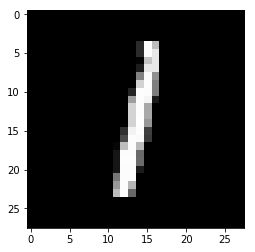

In [8]:
plt.imshow(single_image,cmap='gist_gray')

In [9]:
# PlaceHolders
x=tf.placeholder(dtype=tf.float32,shape=[None,784])

In [10]:
#Variables
w=tf.Variable(tf.zeros([784,10]))
b=tf.Variable(tf.zeros([10]))

In [11]:
#Create Graph Operations
y=tf.matmul(x,w)+b

In [12]:
#LOSS FUNCTION
y_true=tf.placeholder(tf.float32,[None,10])

In [13]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

In [14]:
#Optimizer
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.1)
train=optimizer.minimize(cross_entropy)

In [15]:
# Create Session
init=tf.global_variables_initializer()

In [16]:
with tf.Session() as sess:
    sess.run(init)
    for step in range(1000):
        batch_x,batch_y=mnist.train.next_batch(100)
        sess.run(train,feed_dict={x:batch_x,y_true:batch_y})
     
    #Evaluate the model
    correct_prediction=tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))
    
    acc=tf.reduce_mean(tf.cast(correct_prediction,tf.float32))

    print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9105
